In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Barents = pd.read_excel(filepath, sheet_name='Barents-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Barents)
fp.date_time(Barents)

,Extent,Date
0,1107873.946,1979-01-01
1,1211101.473,1979-02-01
2,1215128.770,1979-03-01
3,1233940.811,1979-04-01
4,1193061.566,1979-05-01
...,...,...
533,124025.343,2023-06-01
534,53107.426,2023-07-01
535,11242.827,2023-08-01
536,3272.024,2023-09-01


In [5]:
scaler = MinMaxScaler()
Barents['Extent'] = scaler.fit_transform(Barents['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 6
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Barents['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((521, 12, 1), (521,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Barents_model_LT6/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1731 - root_mean_squared_error: 0.4160

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 8s 94ms/step - loss: 0.1696 - root_mean_squared_error: 0.4119 - val_loss: 0.0501 - val_root_mean_squared_error: 0.2239
Epoch 2/50
39/53 [=====================>........] - ETA: 0s - loss: 0.1347 - root_mean_squared_error: 0.3670

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.1250 - root_mean_squared_error: 0.3536 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1985
Epoch 3/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0981 - root_mean_squared_error: 0.3132

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 4s 82ms/step - loss: 0.0977 - root_mean_squared_error: 0.3126 - val_loss: 0.0324 - val_root_mean_squared_error: 0.1799
Epoch 4/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0751 - root_mean_squared_error: 0.2740

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0744 - root_mean_squared_error: 0.2727 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1686
Epoch 5/50
52/53 [============================>.] - ETA: 0s - loss: 0.0591 - root_mean_squared_error: 0.2431

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0595 - root_mean_squared_error: 0.2439 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1625
Epoch 6/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0467 - root_mean_squared_error: 0.2161 - val_loss: 0.0265 - val_root_mean_squared_error: 0.1627
Epoch 7/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0368 - root_mean_squared_error: 0.1919 - val_loss: 0.0270 - val_root_mean_squared_error: 0.1644
Epoch 8/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0314 - root_mean_squared_error: 0.1771

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0327 - root_mean_squared_error: 0.1807 - val_loss: 0.0254 - val_root_mean_squared_error: 0.1594
Epoch 9/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0249 - root_mean_squared_error: 0.1579 - val_loss: 0.0271 - val_root_mean_squared_error: 0.1645
Epoch 10/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0238 - root_mean_squared_error: 0.1542 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1605
Epoch 11/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0206 - root_mean_squared_error: 0.1435

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0216 - root_mean_squared_error: 0.1471 - val_loss: 0.0250 - val_root_mean_squared_error: 0.1581
Epoch 12/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0192 - root_mean_squared_error: 0.1387

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0201 - root_mean_squared_error: 0.1418 - val_loss: 0.0195 - val_root_mean_squared_error: 0.1396
Epoch 13/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0203 - root_mean_squared_error: 0.1424

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 4s 83ms/step - loss: 0.0204 - root_mean_squared_error: 0.1428 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1296
Epoch 14/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0185 - root_mean_squared_error: 0.1360 - val_loss: 0.0168 - val_root_mean_squared_error: 0.1297
Epoch 15/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0192 - root_mean_squared_error: 0.1387 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1316
Epoch 16/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0196 - root_mean_squared_error: 0.1398

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0192 - root_mean_squared_error: 0.1387 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1171
Epoch 17/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0217 - root_mean_squared_error: 0.1474 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1334
Epoch 18/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0177 - root_mean_squared_error: 0.1330 - val_loss: 0.0180 - val_root_mean_squared_error: 0.1342
Epoch 19/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0186 - root_mean_squared_error: 0.1363 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1256
Epoch 20/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0192 - root_mean_squared_error: 0.1386 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1172
Epoch 21/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0191 - root_mean_squared_error: 0.1382 - val_loss: 0.0163 - val_root_mean_squared

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.0186 - root_mean_squared_error: 0.1364 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1129
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0157 - root_mean_squared_error: 0.1254 - val_loss: 0.0198 - val_root_mean_squared_error: 0.1407
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0169 - root_mean_squared_error: 0.1299 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1195
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0192 - root_mean_squared_error: 0.1385 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1528
Epoch 27/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0176 - root_mean_squared_error: 0.1326 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1246
Epoch 28/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0172 - root_mean_squared_error: 0.1313

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0168 - root_mean_squared_error: 0.1298 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1090
Epoch 29/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0179 - root_mean_squared_error: 0.1339 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1184
Epoch 30/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0174 - root_mean_squared_error: 0.1318 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1245
Epoch 31/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0179 - root_mean_squared_error: 0.1339 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106
Epoch 32/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0168 - root_mean_squared_error: 0.1296

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0173 - root_mean_squared_error: 0.1314 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1018
Epoch 33/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0167 - root_mean_squared_error: 0.1294 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1144
Epoch 34/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1132
Epoch 35/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0176 - root_mean_squared_error: 0.1325 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1207
Epoch 36/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0163 - root_mean_squared_error: 0.1277 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1046
Epoch 37/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0182 - root_mean_squared_error: 0.1348 - val_loss: 0.0174 - val_root_mean_squared

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0206 - root_mean_squared_error: 0.1435 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1009
Epoch 41/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0200 - root_mean_squared_error: 0.1415 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1181
Epoch 42/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0197 - root_mean_squared_error: 0.1404 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1214
Epoch 43/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0192 - root_mean_squared_error: 0.1387 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1089
Epoch 44/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0165 - root_mean_squared_error: 0.1286 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1200
Epoch 45/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0172 - root_mean_squared_error: 0.1312 - val_loss: 0.0133 - val_root_mean_squared

INFO:tensorflow:Assets written to: Barents_model_LT6\assets


INFO:tensorflow:Assets written to: Barents_model_LT6\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0182 - root_mean_squared_error: 0.1350 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1009
Epoch 48/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0156 - root_mean_squared_error: 0.1250 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1199
Epoch 49/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0201 - root_mean_squared_error: 0.1417 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1187
Epoch 50/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0161 - root_mean_squared_error: 0.1268 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1208


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.3527947465578716 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

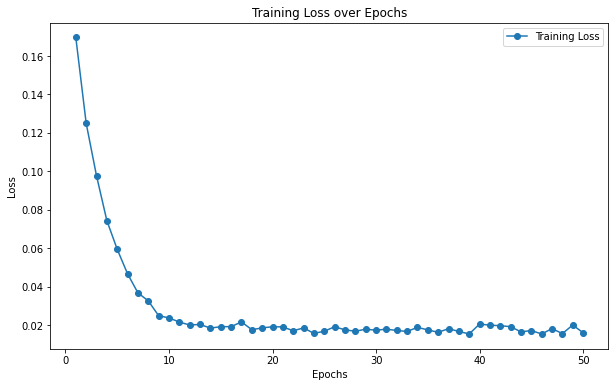

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

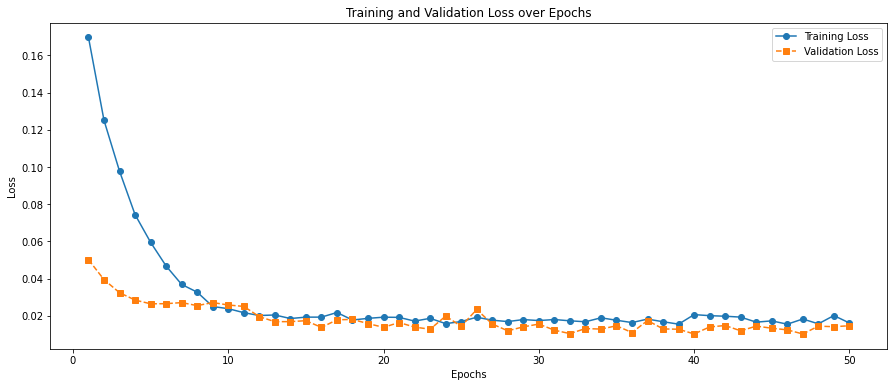

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Barents_model_LT6/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 1s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.11150458269879766
MAE : 0.09627298030912305


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,-84298.984375,54595.378
1,117331.101562,242829.930
2,245583.546875,406860.687
3,375196.843750,605897.837
4,464404.875000,654073.790
5,552647.125000,701143.910
6,552798.187500,657891.340
7,452283.343750,432215.421
8,270433.562500,201834.787
9,95688.296875,55041.511


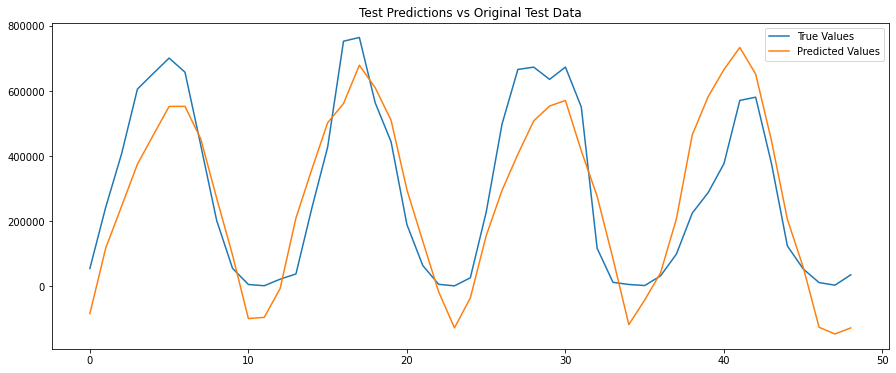

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

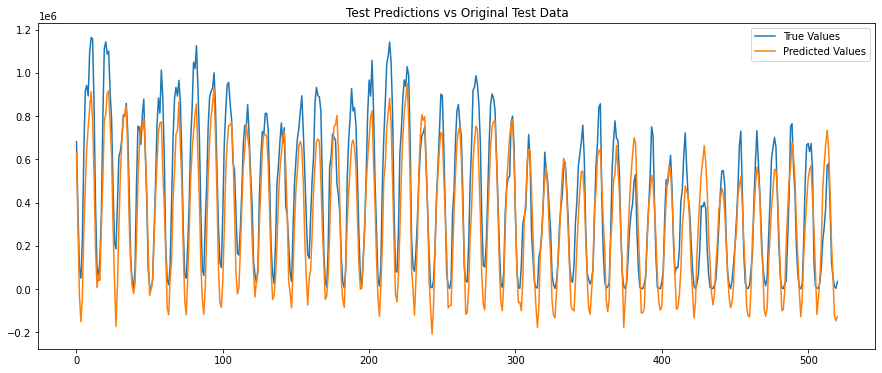

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()